Link: https://github.com/angels21/sentiment.git

# Twitter US Airline Sentiment


A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from
February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed
by categorizing negative reasons (such as "late flight" or "rude service").


## Data Description:
The dataset has the following columns:
> *   tweet_id
*   airline_sentiment
*   airline_sentiment_confidence
*   negativereason
*   negativereason_confidence
*   airline
*   airline_sentiment_gold
*   name
*   negativereason_gold
*   retweet_count
*   text
*   tweet_coord
*   tweet_created
*   tweet_location
*   user_timezone





## Objective:
To implement the techniques learnt as a part of the course, listed in steps and tasks

##Steps and Tasks
1. Import the libraries, load dataset, print shape of data, data description. (5 Marks)


In [1]:
# install and import necessary libraries.

!pip install contractions

import re, string, unicodedata                          # Import Regex, string and unicodedata.
import contractions                                     # Import contractions library.
from bs4 import BeautifulSoup                           # Import BeautifulSoup.

import numpy as np                                      # Import numpy.
import pandas as pd                                     # Import pandas.
import nltk                                             # Import Natural Language Tool-Kit.

nltk.download('stopwords')                              # Download Stopwords.
nltk.download('punkt')
nltk.download('wordnet')

from nltk.corpus import stopwords                       # Import stopwords.
from nltk.tokenize import word_tokenize, sent_tokenize  # Import Tokenizer.
from nltk.stem.wordnet import WordNetLemmatizer         # Import Lemmatizer.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
#Import google drive library
from google.colab import drive

In [3]:
#Mount the drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [4]:
#Point drive to project directory
project_path = '/content/drive/My Drive/Colab Notebooks/'

In [5]:
#Set path to the project directory 
dataset_file = project_path + 'Tweets.csv'

In [6]:
# Loading data into pandas dataframe
data = pd.read_csv(dataset_file)

In [7]:
# print shape of data
data.shape                                               

(14640, 15)

In [8]:
# Print first 5 rows of data.
data.head()                                              

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [9]:
#Description of the data
data.describe()

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,1.464000e+04,14640.000000,10522.000000,14640.000000
mean,5.692184e+17,0.900169,0.638298,0.082650
std,7.791112e+14,0.162830,0.330440,0.745778
min,5.675883e+17,0.335000,0.000000,0.000000
25%,5.685592e+17,0.692300,0.360600,0.000000
50%,5.694779e+17,1.000000,0.670600,0.000000
75%,5.698905e+17,1.000000,1.000000,0.000000
max,5.703106e+17,1.000000,1.000000,44.000000


2. Understand of data-columns: (5 Marks)

>*   a. Drop all other columns except “text” and “airline_sentiment”.
*   b. Check the shape of data.
*   c. Print first 5 rows of data.  


In [10]:
#Drop all other columns except text and airline_sentiment
data = data.loc[:14640, ['text', 'airline_sentiment']]

In [11]:
#Shape of data after dropping all colums except two
data.shape

(14640, 2)

In [12]:
# Check for NULL values.
data.isnull().sum(axis=0)                               

text                 0
airline_sentiment    0
dtype: int64

In [13]:
# Display full dataframe information (Non-turncated Text column.)
pd.set_option('display.max_colwidth', None) 
#Print first five rows
data.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials to the experience... tacky.,positive
2,@VirginAmerica I didn't today... Must mean I need to take another trip!,neutral
3,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",negative
4,@VirginAmerica and it's a really big bad thing about it,negative


3. Text pre-processing: Data preparation. (20 Marks)

> *   a. Html tag removal.
*   b. Tokenization.
*   c. Remove the numbers.
*   d. Removal of Special Characters and Punctuations.
*   e. Conversion to lowercase.
*   f. Lemmatize or stemming.
*   g. Join the words in the list to convert back to text string in the dataframe. (So that each row
contains the data in text format.)
*   h. Print first 5 rows of data after pre-processing

In [14]:
#a. Html tag removal
def strip_html_cleanup(text):
  # 1. Remove HTML tag
  soup = BeautifulSoup(text, "html.parser").get_text()
  return soup

In [15]:
def replace_contractions(text):                    
    """Replace contractions in string of text"""
    return contractions.fix(text)

In [16]:
#b. Tokenization
def perform_tokenization(text):
  # 2. Perform Tokenization
  word_tokens = word_tokenize(text)
  return word_tokens

In [17]:
#c. Remove numbers
def remove_numbers(list_of_words): 
#def remove_numbers(text):
  #text = re.sub(r'\d+', '', text)
  list = [re.sub(r'\d+', '', i) for i in list_of_words] 
  return list

In [18]:
#d. Removal of Special Characters and Punctuations.
def remove_special_character_punctuation(list_of_words): 
    pattern = '[^A-Za-z0-9]+'
    list = [re.sub(pattern, '', i) for i in list_of_words] 
    return list

In [19]:
# Remove punctuations
def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []                        # Create empty list to store pre-processed words.
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)    # Append processed words to new list.
    return new_words

In [20]:
#e. Convertion to lower case
def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []                        # Create empty list to store pre-processed words.
    for word in words:
        new_word = word.lower()           # Converting to lowercase
        new_words.append(new_word)        # Append processed words to new list.
    return new_words

In [21]:
#Remove empty string
def remove_empty_string(words):
  return list(filter(None, words))

In [22]:
#f. Lemmatization
def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []                           # Create empty list to store pre-processed words.
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)              # Append processed words to new list.
    return lemmas

In [23]:
#Perform complete pre-processing
def perform_cleanup(text):
    clean_text = strip_html_cleanup(text)
    clean_text = replace_contractions(clean_text)
    clean_text = perform_tokenization(clean_text)
    clean_text = remove_numbers(clean_text)
    clean_text = remove_special_character_punctuation(clean_text)
    clean_text = remove_punctuation(clean_text)
    clean_text  = to_lowercase(clean_text)
    clean_text = remove_empty_string(clean_text)
    clean_text = lemmatize_verbs(clean_text)
    return clean_text

In [24]:
#g. Join the words in the list to convert back to text string in the dataframe
clean_texts = []

for i, row in data.iterrows():
    words = data.at[i, 'text']
    words = perform_cleanup(words)
    data.at[i,'text'] = " ".join( words )
    clean_texts.append( data.at[i, 'text'] )

In [25]:
#h. Print first 5 rows of data after pre-processing
data.head()

,text,airline_sentiment
0,virginamerica what dhepburn say,neutral
1,virginamerica plus you have add commercials to the experience tacky,positive
2,virginamerica i do not today must mean i need to take another trip,neutral
3,virginamerica it be really aggressive to blast obnoxious entertainment in your guests face they have little recourse,negative
4,virginamerica and it be a really big bad thing about it,negative


4. Vectorization: (10 Marks)

> *   a. Use CountVectorizer.
*   b. Use TfidfVectorizer.

**a. Count Vectorizer**


In [26]:
#Creating the bag of words
from sklearn.feature_extraction.text import CountVectorizer
# Initialize the "CountVectorizer" object, which is scikit-learn's bag of words tool.  
count_vectorizer = CountVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = None,   \
                             max_features = 5000) 

# fit_transform() does two functions: First, it fits the model
# and learns the vocabulary; second, it transforms our training data
# into feature vectors. The input to fit_transform should be a list of 
# strings.
count_vectorizer_data_features = count_vectorizer.fit_transform(clean_texts)

# Convert to array
count_vectorizer_data_features = count_vectorizer_data_features.toarray()

In [27]:
#View shape and array of vectorized data
print (count_vectorizer_data_features.shape)
print(count_vectorizer_data_features)

(14640, 5000)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


**b. TfidfVectorizer.**

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Initialize the "TfidfVectorizer" object, Convert a collection of raw documents to a matrix of TF-IDF features.
tfidf_vectorizer = TfidfVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = None,   \
                             max_features = 5000,
                             min_df=5, 
                             max_df=0.7,
                             ngram_range=(1,2)) 


tfidf_vectorizer_data_features = tfidf_vectorizer.fit_transform(clean_texts)

# Convert result to an array
tfidf_vectorizer_data_features = tfidf_vectorizer_data_features.toarray()

In [29]:
#View shape and array of vectorized data
print (tfidf_vectorizer_data_features.shape)
print(tfidf_vectorizer_data_features)

(14640, 5000)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


5. Fit and evaluate model using both type of vectorization. (6+6 Marks)

**a. Fit and Evaluate using Count Vectorizer**


In [30]:
# Split data into training and testing set.

from sklearn.model_selection import train_test_split
x = count_vectorizer_data_features     # Predictor feature columns
y = data['airline_sentiment']   # Predicted class

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [31]:
# Using Random Forest to build model for the classification of reviews.
# Also calculating the cross validation score.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

forest = RandomForestClassifier(n_estimators=10, n_jobs=4)

forest = forest.fit(X_train, y_train) #fitting the model

print(forest)
print()

#Evalute by cross validation
print("Cross Validation score for count Vectorizer" ,np.mean(cross_val_score(forest, count_vectorizer_data_features, y, cv=10)))
print()

#Print model testing accuracy
print("Test accuracy for Count Vectorizer",forest.score(X_test, y_test))
print()

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=4,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

Cross Validation score for count Vectorizer 0.7157103825136613

Test accuracy for Count Vectorizer 0.7584244080145719



In [32]:
# Predict the result for test data using the model built above.
result = forest.predict(X_test)

[[2647  115   52]
 [ 490  346   48]
 [ 253  103  338]]


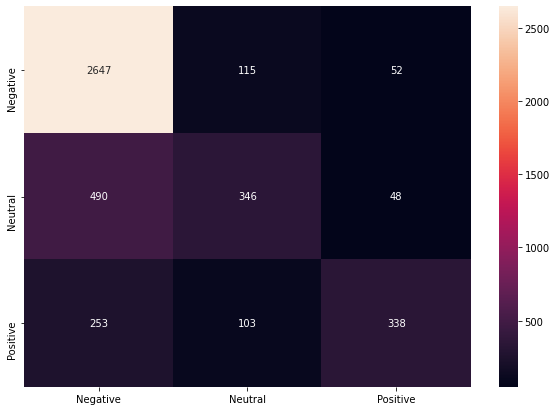

In [33]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, result)

print(conf_mat)

df_cm = pd.DataFrame(conf_mat, index = ['Negative', 'Neutral', 'Positive'],
                  columns = ['Negative', 'Neutral', 'Positive'])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

**b. Fit and Evaluate using Tfidf Vectorizer**


In [34]:
x_tfidf = tfidf_vectorizer_data_features     # Predictor feature columns for tfidf
y_tfidf = data['airline_sentiment']   # Predicted class
X_train2, X_test2, y_train2, y_test2 = train_test_split(x_tfidf, y_tfidf, test_size=0.3, random_state=42)


In [35]:
# Using Random Forest to build model for the classification of reviews.
# Also calculating the cross validation score.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

forest = RandomForestClassifier(n_estimators=10, n_jobs=4)

forest = forest.fit(X_train2, y_train2)

print(forest)
print()

print("Cross Validation score for Tfidf Vectorizer",np.mean(cross_val_score(forest, x_tfidf, y_tfidf, cv=10)))
print()

#Print model testing accuracy
print("Test accuracy for Tfidf Vectorizer",forest.score(X_test2, y_test2))
print()

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=4,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

Cross Validation score for Tfidf Vectorizer 0.7208333333333334

Test accuracy for Tfidf Vectorizer 0.7591074681238615



In [36]:
result = forest.predict(X_test2)

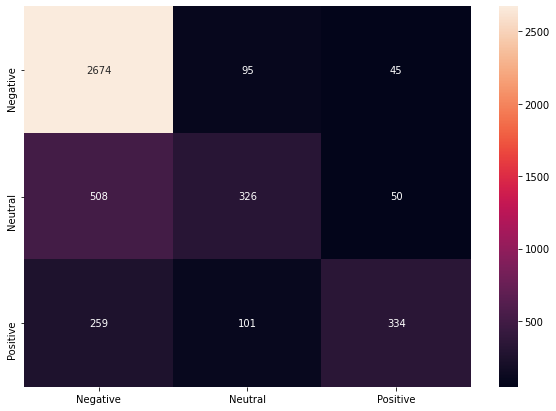

In [37]:
#Confusion matrix for tfidf_vectorizer
conf_mat = confusion_matrix(y_test2, result)

df_cm = pd.DataFrame(conf_mat, index = ['Negative', 'Neutral', 'Positive'],
                  columns = ['Negative', 'Neutral', 'Positive'])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

6. Summarize your understanding of the application of Various Pre-processing and Vectorization and
performance of your model on this dataset. (8 Marks)

**Pre-processing**
1. HTML tag stripping
-  Returns all the text in a document or beneath a tag
2. Replace Contractions
- Contractions are shortened version of words. They are converted to their lenghtened form. eg wouldn't is converted to would not
3. Tokenization
- longer strings of text are splitted into smaller pieces, or tokens. 
4. Removing numbers
- Remove numbers from list of tokenized words
5. Remove special characters
- Special characters are removed from list of tokenized words
6. Remove punctuation
- Punctuations were removed from list of tokenized words
7. Convert text to lower case
- converting all text to the same case reduces number of words in the documents which in turn reduces computation time
8. Remove empty strings
- Remove empty string from list of tokenized words
9. Lemmatization
- Lemmatization converts word into their base form and ensuring the words have meaning and belongs to the language. 

**Vectorization**
Two methods were used

- **Bag of words(CountVectorization)**:
A dictionary that contains set of all unique words from the dataset was created. The frequency of occurence of the word is counted. If there are d unique words in our dictionary then for every sentence or review the vector will be of length d and count of word from review is stored at its particular location in vector. The vector will be highly sparse in such case.
-**Tf-idf(TfIdfVectorization)  (Term Frequency - Inverse Document Frequency)**:
It attaches less importance to most frequently occuring words and also considers less frequently occuring words. Term Frequency is number of times a particular word occurs in a review divided by total number of words in review. The term frequency value ranges from 0 to 1. Inverse Document Frequency is calculated as log(Total Number of Docs / Number of Docs which contains particular word).

**Performance of model**
- RandomForestClassifier on TfidfVectorizer has an accuracy of 75.91% and a cross validation score of 72.08% whereas RandomForestClassifier on CountVectorizer has an accuracy of 75.84% and a cross validation score of 71.57%. This shows that the model using TfidfVectorizer is performed better.
The Model is able to predict airline sentiment correctly 76% of the time.

